# Projeto de Estatística II


## Parte I - Regressão Linear

-------------------------------

### Enunciado


-------------------------------

**Instruções:**

- A primeira parte do projeto engloba a avliação dos tópicos de regressão linear.
- Ela deve ser entregue até o dia 26/04/2022.
- Para a entrega, salve seu notebook na pasta Projetos do nosso drive com o nome do notebook com o seguinte padrão: [primeiro nome]_[sobrenome]_projeto_estatistica_II_parteI.ipynb
- A avaliação será registrada nos notebooks em formato de comentários.
-------------------------------

O dataset 'cancer_EUA.csv' relaciona a taxa de mortalidade por câncer em alguns condados dos EUA e outras features destes condados.

Dicionário dos dados:

* TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities

* avgAnnCount: Mean number of reported cases of cancer diagnosed annually

* avgDeathsPerYear: Mean number of reported mortalities due to cancer

* incidenceRate: Mean per capita (100,000) cancer diagoses

* medianIncome: Median income per county

* popEst2015: Population of county

* povertyPercent: Percent of populace in poverty

* studyPerCap: Per capita number of cancer-related clinical trials per county

* binnedInc: Median income per capita binned by decile

* MedianAge: Median age of county residents

* MedianAgeMale: Median age of male county residents

* MedianAgeFemale: Median age of female county residents

* Geography: County name

* AvgHouseholdSize: Mean household size of county

* PercentMarried: Percent of county residents who are married

* PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

* PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

* PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

* PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

* PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

* PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

* PctEmployed16_Over: Percent of county residents ages 16 and over employed

* PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

* PctPrivateCoverage: Percent of county residents with private health coverage

* PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

* PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

* PctPublicCoverage: Percent of county residents with government-provided health coverage

* PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

* PctWhite: Percent of county residents who identify as White

* PctBlack: Percent of county residents who identify as Black

* PctAsian: Percent of county residents who identify as Asian

* PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

* PctMarriedHouseholds: Percent of married households

* BirthRate: Number of live births relative to number of women in county

O objetivo da primeira parte do projeto é criar um modelo linear para prever o target (TARGET_deathRate). Para isso, siga o passo a passo abaixo e apresente seus raciocínios e resultados. 

1. Antes de qualquer exploração dos dados, leia o dicionário dos dados e reflita sobre a feature que você acredita ser mais correlacionada com o target. (Sem medo de errar. Não existe certo ou errado nesta questão.) 

2. Agora, realize um EDA na base de dados para entender mais sobre as features. Quais são suas conclusões?

3. Como o target está distribuído? Quais são as seus valores de média, mediana e variância? A distribuição é assimétrica?

3. Pensando em um modelo de Regressão Linear Simples escolha uma feature para ser a variável independente, mas procure escolher uma que faça sentido com o modelo linear. 

    3.1. Como é a distribuição da feature escolhida? Ela possui outliers? Precisa de alguma limpeza nos dados?

    3.2. Treine um modelo de Regressão Linear Simples com o objetivo de predizer a variável dependente 'TARGET_deathRate'. Apresente o modelo treinado e avalie a normalidade dos resíduos. Não esqueça de dividir o dataset em treino e teste para uma posterior avaliação do modelo.

    3.3 Utilizando as métricas de avaliação verifique o resultado do modelo para o conjunto de dados de teste.

4. Agora, treine um modelo de Regressão Linear múltipla sem utilizar o min-max scaler e outro com o min-max scaler. Qual obteve o melhor resultado no teste? Quais são as features mais importantes?

5. Compare os três modelos desenvolvidos.

### Nome: João Pedro do Nascimento Sandolin
#### Turma 857 - Data Science Degree

### Questão 1

Algumas features que parecem ter uma alta correlação com o target são:
- **avgAnnCount**: Por representar a média de casos de câncer anual, faz sentido que a taxa de mortalidade esteja relacionada com o número de casos da mesma patologia. Porém, o fato desta feature não ser per capita e, portanto, podendo estar enviesada pelo tamnho da população do condado (o que não ocorre com o target por ser per capita), pode diminuir esta correlação. 
- **avgDeathsPerYear**:Deve apresentar uma correlação maior que a média de casos por ser diretamente relacionada com o número de mortes, porém, pode ter o mesmo problema de estar enviesada pelo tamanho da população.
- **incidenceRate**:Deve ter uma correlação maior que a média de casos por ser uma média per capita.
- **MedianAge**:Deve tamém apresentar uma alta correlação considerando que a idade elevada é um fator de risco para o câncer.  
  
Destas, considero que **avgDeathsPerYear** e **incidenceRate** devem apresentar as correlações mais altas com o target, a primeira por estar relacionada diretamente com o número de mortes e a segunda por representar uma estatística per capita do número de casos.

### Questão 2

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
path = 'dataset/'
df = pd.read_excel(path + 'cancer_EUA.xlsx')
df.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0        890.770529             164.9          489.8      61898   
1        173.0        669.088363             161.3          411.6      48127   
2        102.0        744.083462             174.7          349.7      49348   
3        427.0        953.773339             194.8          430.4      44243   
4         57.0        646.194438             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 34 columns]

In [263]:
df.shape

(3047, 34)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   float64
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [265]:
df.describe()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count   3047.000000       3047.000000       3047.000000    3047.000000   
mean     606.338544        843.919853        178.491008     448.268586   
std     1416.356223        143.907390         27.629797      54.560733   
min        6.000000        294.277385         56.000000     201.300000   
25%       76.000000        746.660187        161.200000     420.300000   
50%      171.000000        842.516774        178.100000     453.549422   
75%      518.000000        939.423171        195.200000     480.850000   
max    38150.000000       1553.351487        293.900000    1206.900000   

           medIncome    popEst2015  povertyPercent  studyPerCap    MedianAge  \
count    3047.000000  3.047000e+03     3047.000000  3047.000000  3047.000000   
mean    47063.281917  1.026374e+05       16.878175   155.399415    45.272333   
std     12040.090836  3.290592e+05        6.409087   529.628366    45.304480   
min     22640.000000  8.270000e+02        3.200000     0.000000    22.300000   
25%     38882.500000  1.168400e+04       12.150000     0.000000    37.700000   
50%     45207.000000  2.664300e+04       15.900000     0.000000    41.000000   
75%     52492.000000  6.867100e+04       20.400000    83.650776    44.000000   
max    125635.000000  1.017029e+07       47.400000  9762.308998   624.000000   

       MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
count    3047.000000  ...              2438.000000         3047.000000   
mean       39.570725  ...                48.453774           41.196324   
std         5.226017  ...                10.083006            9.447687   
min        22.400000  ...                15.700000           13.500000   
25%        36.350000  ...                41.000000           34.500000   
50%        39.600000  ...                48.700000           41.100000   
75%        42.500000  ...                55.600000           47.700000   
max        64.700000  ...                78.900000           70.700000   

       PctPublicCoverage  PctPublicCoverageAlone     PctWhite     PctBlack  \
count        3047.000000             3047.000000  3047.000000  3047.000000   
mean           36.252642               19.240072    83.645286     9.107978   
std             7.841741                6.113041    16.380025    14.534538   
min            11.200000                2.600000    10.199155     0.000000   
25%            30.900000               14.850000    77.296180     0.620675   
50%            36.300000               18.800000    90.059774     2.247576   
75%            41.550000               23.100000    95.451693    10.509732   
max            65.100000               46.600000   100.000000    85.947799   

          PctAsian  PctOtherRace  PctMarriedHouseholds    BirthRate  
count  3047.000000   3047.000000           3047.000000  3047.000000  
mean      1.253965      1.983523             51.243872     5.640306  
std       2.610276      3.517710              6.572814     1.985816  
min       0.000000      0.000000             22.992490     0.000000  
25%       0.254199      0.295172             47.763063     4.521419  
50%       0.549812      0.826185             51.669941     5.381478  
75%       1.221037      2.177960             55.395132     6.493677  
max      42.619425     41.930251             78.075397    21.326165  

[8 rows x 32 columns]

In [266]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

**PctSomeCol18_24** e **PctPrivateCoverageAlone** possuem muitos valores faltantes, não são boas features para fazer o modelo.

In [267]:
df.duplicated().sum()

0

#### Estudando a correlação das variáveis

In [268]:
correlacao = df.corr(method='spearman')
correlacao

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  \
avgAnnCount                 1.000000         -0.087692         -0.085583   
avgDeathsPerYear           -0.087692          1.000000          0.672511   
TARGET_deathRate           -0.085583          0.672511          1.000000   
incidenceRate               0.264905          0.274470          0.407906   
medIncome                   0.346061         -0.328660         -0.463858   
popEst2015                  0.810315         -0.043376         -0.044447   
povertyPercent             -0.195880          0.327645          0.442435   
studyPerCap                 0.508170         -0.087545         -0.112687   
MedianAge                  -0.239157         -0.006874          0.008589   
MedianAgeMale              -0.244608         -0.011604         -0.004532   
MedianAgeFemale            -0.258758          0.003867          0.019903   
AvgHouseholdSize            0.118222          0.024783          0.013300   
PercentMarried             -0.172258         -0.184165         -0.257257   
PctNoHS18_24               -0.296569          0.071910          0.124543   
PctHS18_24                 -0.235587          0.197543          0.275896   
PctSomeCol18_24             0.330782         -0.147881         -0.212383   
PctBachDeg18_24             0.381605         -0.184054         -0.270316   
PctHS25_Over               -0.347638          0.277944          0.420579   
PctBachDeg25_Over           0.392733         -0.347502         -0.501730   
PctEmployed16_Over          0.259640         -0.307593         -0.433174   
PctUnemployed16_Over        0.073620          0.284581          0.402940   
PctPrivateCoverage          0.269957         -0.301268         -0.411319   
PctPrivateCoverageAlone     0.327338         -0.265507         -0.380840   
PctEmpPrivCoverage          0.391781         -0.199474         -0.277938   
PctPublicCoverage          -0.250184          0.278845          0.402365   
PctPublicCoverageAlone     -0.153674          0.322418          0.453102   
PctWhite                   -0.182280         -0.093744         -0.101955   
PctBlack                    0.256661          0.196736          0.251542   
PctAsian                    0.561944         -0.151574         -0.207830   
PctOtherRace                0.242279         -0.120319         -0.216924   
PctMarriedHouseholds       -0.118769         -0.193525         -0.279620   
BirthRate                  -0.071837         -0.059738         -0.050487   

                         incidenceRate  medIncome  popEst2015  povertyPercent  \
avgAnnCount                   0.264905   0.346061    0.810315       -0.195880   
avgDeathsPerYear              0.274470  -0.328660   -0.043376        0.327645   
TARGET_deathRate              0.407906  -0.463858   -0.044447        0.442435   
incidenceRate                 1.000000   0.010581    0.186183        0.010033   
medIncome                     0.010581   1.000000    0.309171       -0.884297   
popEst2015                    0.186183   0.309171    1.000000       -0.083300   
povertyPercent                0.010033  -0.884297   -0.083300        1.000000   
studyPerCap                   0.162131   0.257010    0.562972       -0.125192   
MedianAge                     0.016922  -0.115359   -0.408627       -0.149297   
MedianAgeMale                 0.008706  -0.088881   -0.413663       -0.176155   
MedianAgeFemale               0.003489  -0.160013   -0.431936       -0.103869   
AvgHouseholdSize             -0.084246   0.104335    0.295149        0.088690   
PercentMarried               -0.115636   0.375900   -0.322732       -0.598271   
PctNoHS18_24                 -0.142784  -0.322642   -0.306822        0.285646   
PctHS18_24                    0.020066  -0.199432   -0.209124        0.113834   
PctSomeCol18_24               0.018900   0.274998    0.329147       -0.197924   
PctBachDeg18_24               0.103372   0.474073    0.349674       -0.430431   
PctHS25_Over                  0.128990  -0.392909   -0.380

<AxesSubplot:>

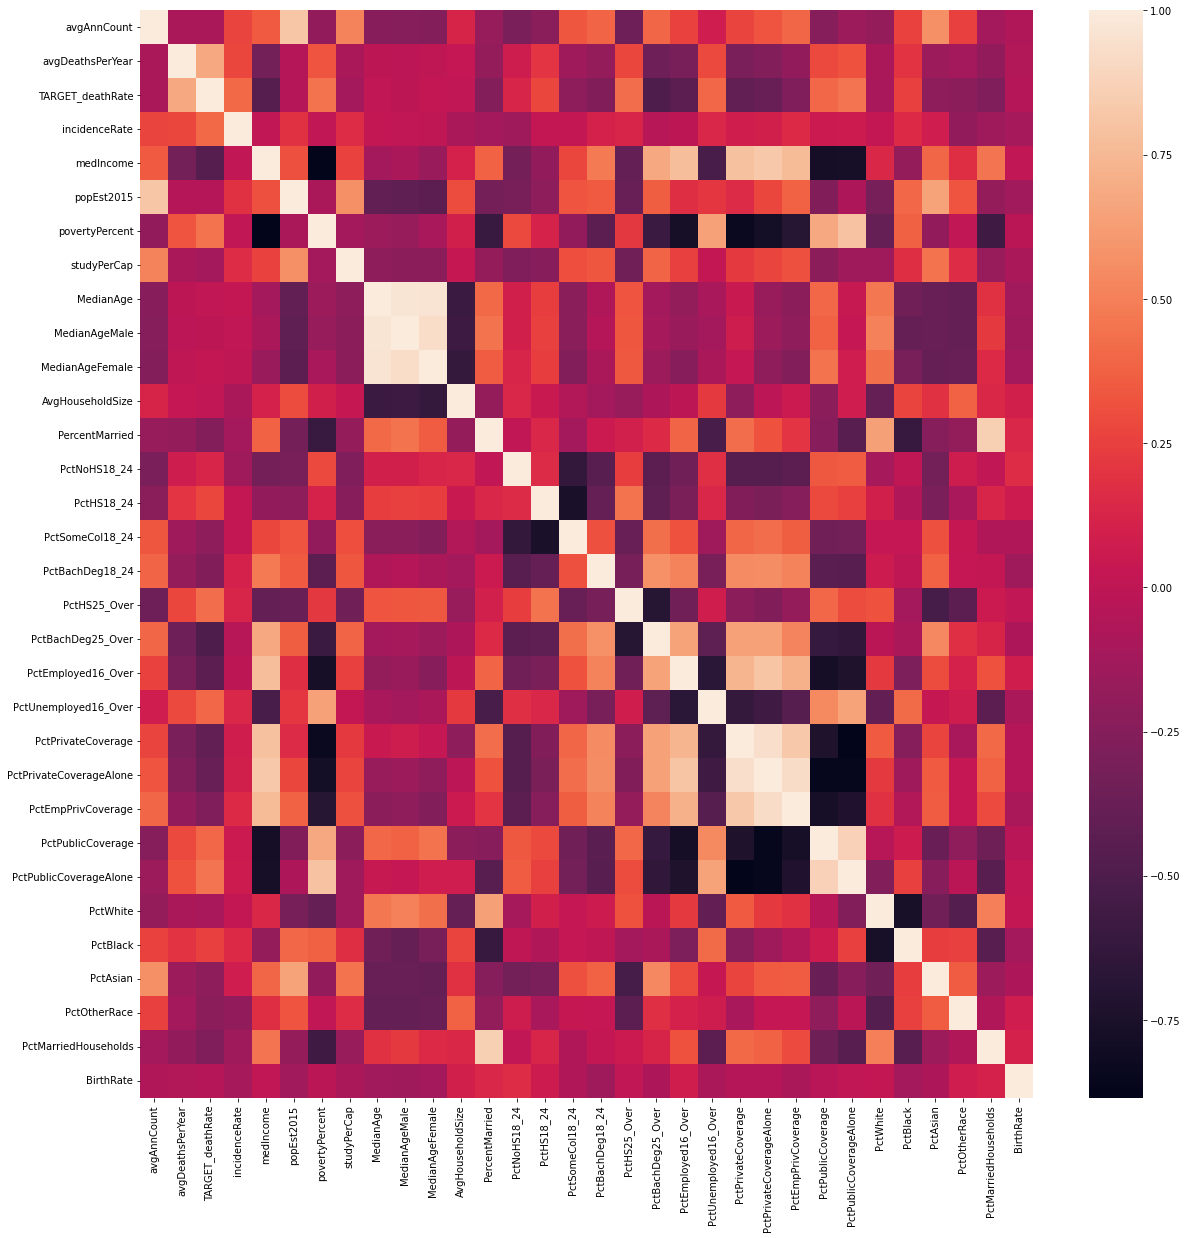

In [269]:
plt.figure(figsize=(20,20))
sns.heatmap(correlacao)

In [270]:
df.corr()[['TARGET_deathRate']].abs().sort_values('TARGET_deathRate', ascending=False)

TARGET_deathRate
TARGET_deathRate                 1.000000
avgDeathsPerYear                 0.678856
PctBachDeg25_Over                0.488874
PctPublicCoverageAlone           0.451853
medIncome                        0.432694
povertyPercent                   0.428604
PctEmployed16_Over               0.415117
PctHS25_Over                     0.412030
PctPublicCoverage                0.409789
incidenceRate                    0.400137
PctPrivateCoverage               0.388807
PctUnemployed16_Over             0.377878
PctPrivateCoverageAlone          0.370576
PctMarriedHouseholds             0.293929
PctBachDeg18_24                  0.286872
PctEmpPrivCoverage               0.271276
PctHS18_24                       0.262683
PercentMarried                   0.260070
PctBlack                         0.249774
PctOtherRace                     0.190181
PctSomeCol18_24                  0.188688
PctAsian                         0.187370
PctWhite                         0.171722
avgAnnCount                      0.142828
popEst2015                       0.119640
PctNoHS18_24                     0.085814
BirthRate                        0.083181
AvgHouseholdSize                 0.038960
MedianAgeMale                    0.021839
studyPerCap                      0.020640
MedianAgeFemale                  0.017865
MedianAge                        0.005273

In [271]:
corr_target = df.corr()[['TARGET_deathRate']].abs().sort_values('TARGET_deathRate', ascending=False)
variaveis_corr = corr_target[(corr_target>0.4)].dropna().index
variaveis_corr

Index(['TARGET_deathRate', 'avgDeathsPerYear', 'PctBachDeg25_Over',
       'PctPublicCoverageAlone', 'medIncome', 'povertyPercent',
       'PctEmployed16_Over', 'PctHS25_Over', 'PctPublicCoverage',
       'incidenceRate'],
      dtype='object')

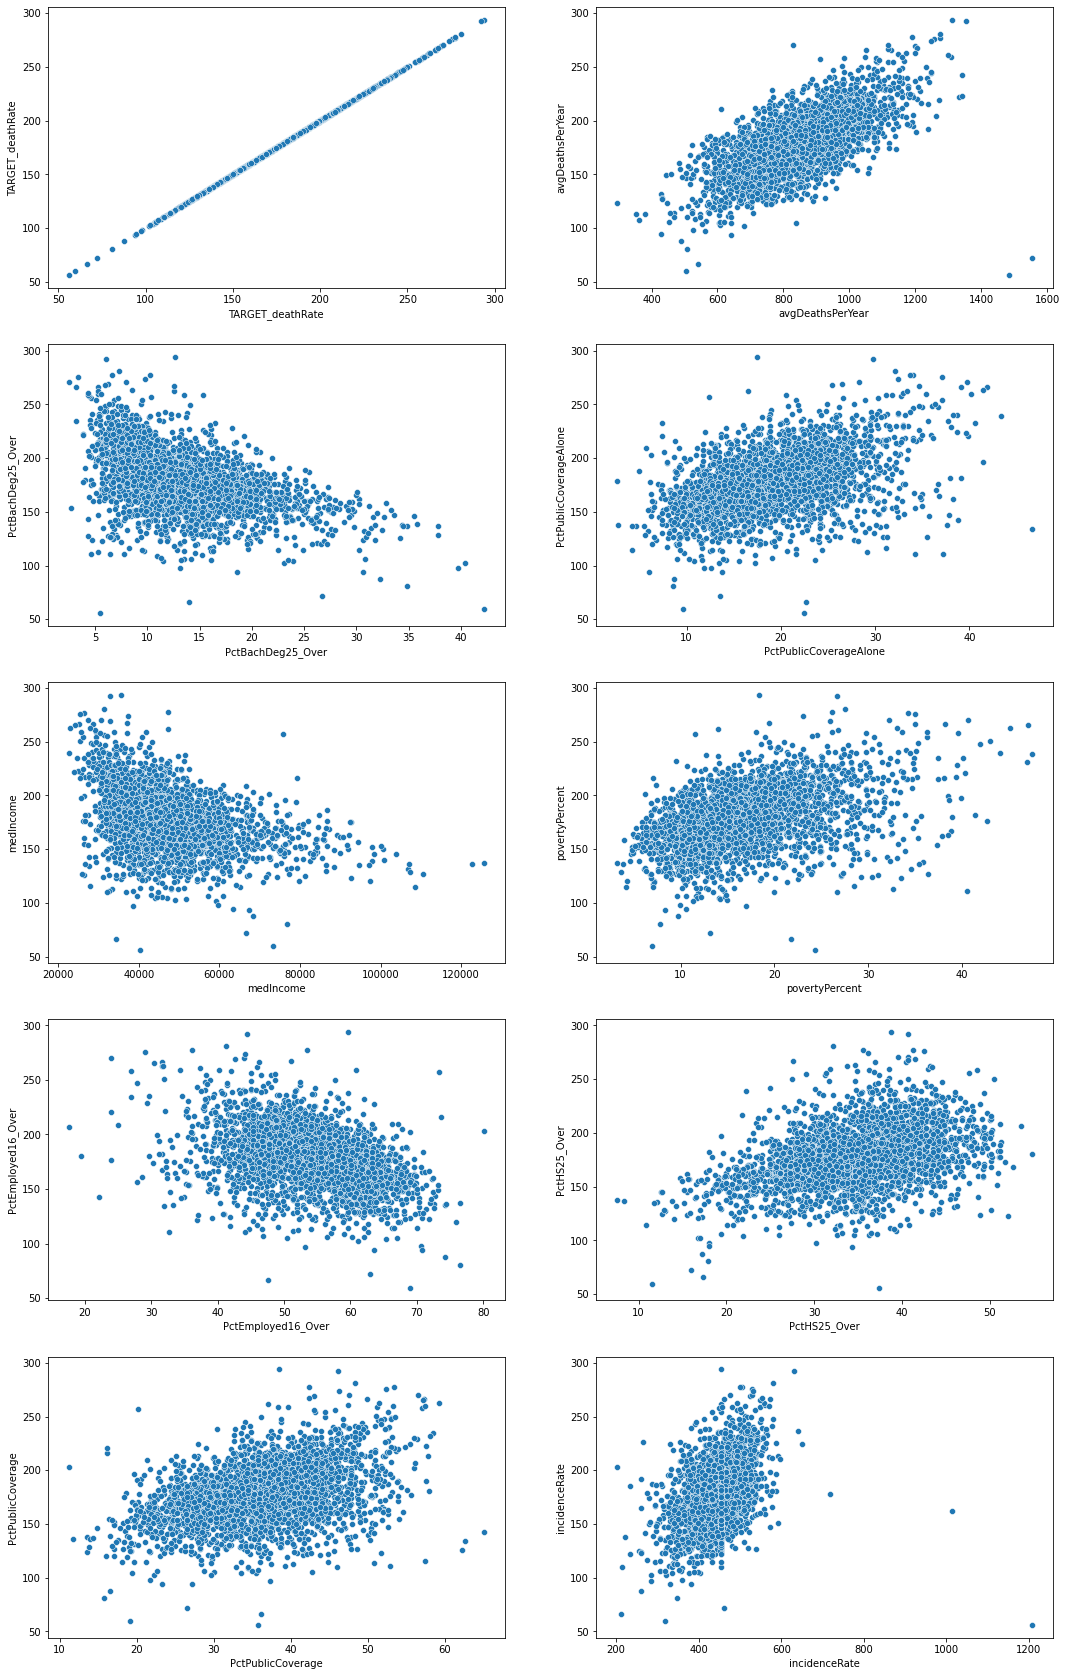

In [272]:
#Gráficos das variáveis com correlação maior que 0.4 com o target.
fig, ax = plt.subplots(5,2, figsize=(18, 30))

count = 0
for i in range(5):
    for j in range(2):
        sns.scatterplot(data=df,y='TARGET_deathRate', x=variaveis_corr[count], ax=ax[i][j])
        ax[i][j].set_ylabel(variaveis_corr[count])
        count = count + 1

Vendo os gráficos e a correlação, fica claro que a melhor feature para realizar um modelo de regressão linear simples é **avgDeathsPerYear**, apesar de possuir dois claros outliers no gráfico, é a feature que esta mais próxima de ter uma relação linear com o target, possuindo a maior coeficiente de correlação.

### Questão 3

#### Analisando o target

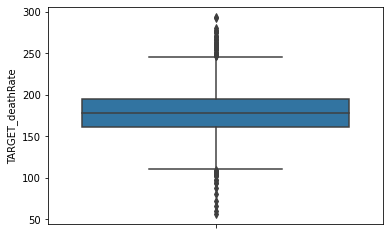

TARGET_deathRate
count       3047.000000
mean         178.491008
std           27.629797
min           56.000000
25%          161.200000
50%          178.100000
75%          195.200000
max          293.900000

In [273]:
sns.boxplot(y=df['TARGET_deathRate'])
plt.show()
df['TARGET_deathRate'].describe().to_frame()

In [274]:
variancia = df['TARGET_deathRate'].var()
media = df['TARGET_deathRate'].mean()
mediana = df['TARGET_deathRate'].median()
moda = df['TARGET_deathRate'].mode()[0]

print(f'Variância: {variancia}')
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Moda: {moda}')

Variância: 763.4056643489253
Média: 178.49100754840828
Mediana: 178.1
Moda: 184.3


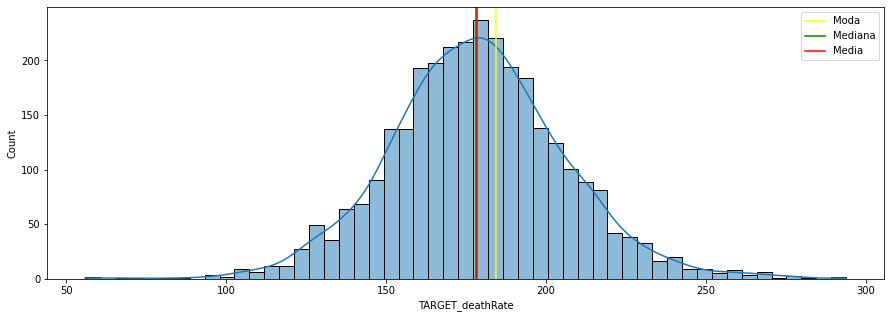

In [275]:
plt.figure(figsize=(15,5))
sns.histplot(x=df['TARGET_deathRate'], kde=True)
plt.axvline(moda, label='Moda', color='yellow')
plt.axvline(mediana, label='Mediana', color='green')
plt.axvline(media, label='Media', color='red')
plt.legend();

In [276]:
#Verificando se amostra possui distribuição normal
from scipy.stats import normaltest

test_stat, p = normaltest(df['TARGET_deathRate'])

print("Estatística de teste:", test_stat)
print("\np-value:", p)

alpha = 0.05

if p > alpha:
    print("\nFalha em rejeitar H_0: amostra parece ser normal")
else:
    print("\nRejeição da H_0: amostra não é normal")

Estatística de teste: 59.744113596480666

p-value: 1.0634830426533282e-13

Rejeição da H_0: amostra não é normal


In [277]:
skew = df['TARGET_deathRate'].skew()
print(f'Skewness: {skew}')

Skewness: 0.12931340277335948


Distribuição é assimétrica, enviesada à direita

#### Analisando a feature escolhida para a regressão linear simples

Feature escolhida: **avgDeathsPerYear**

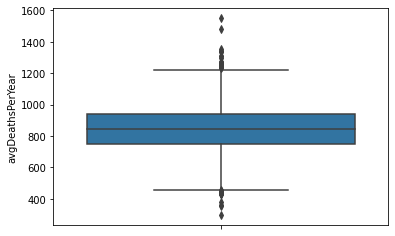

avgDeathsPerYear
count       3047.000000
mean         843.919853
std          143.907390
min          294.277385
25%          746.660187
50%          842.516774
75%          939.423171
max         1553.351487

In [278]:
sns.boxplot(y=df['avgDeathsPerYear'])
plt.show()
df['avgDeathsPerYear'].describe().to_frame()

In [279]:
#Possui muitos outliers
variancia = df['avgDeathsPerYear'].var()
media = df['avgDeathsPerYear'].mean()
mediana = df['avgDeathsPerYear'].median()
moda = df['avgDeathsPerYear'].mode()[0]

print(f'Variância: {variancia}')
print(f'Média: {media}')
print(f'Mediana: {mediana}')

Variância: 20709.336927100543
Média: 843.9198526823612
Mediana: 842.516773706609


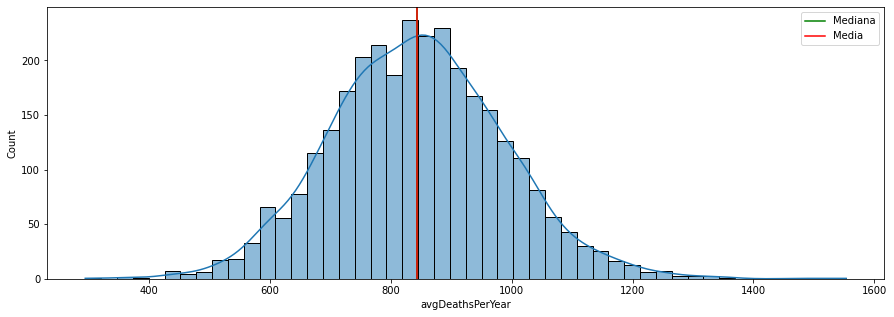

In [280]:
plt.figure(figsize=(15,5))
sns.histplot(x=df['avgDeathsPerYear'], kde=True)
plt.axvline(mediana, label='Mediana', color='green')
plt.axvline(media, label='Media', color='red')
plt.legend();

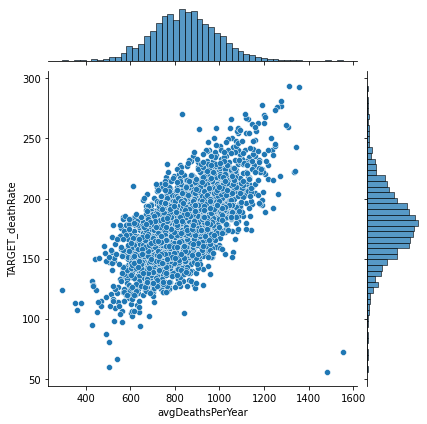

In [281]:
sns.jointplot(data=df, y='TARGET_deathRate', x='avgDeathsPerYear');

In [282]:
#Possui 2 claros outliers que podem atrapalhar a construção do modelo
df[df['avgDeathsPerYear']>1400]['avgDeathsPerYear']

1220    1553.351487
1489    1483.055135
Name: avgDeathsPerYear, dtype: float64

In [283]:
df = df[~(df['avgDeathsPerYear']>1400)]

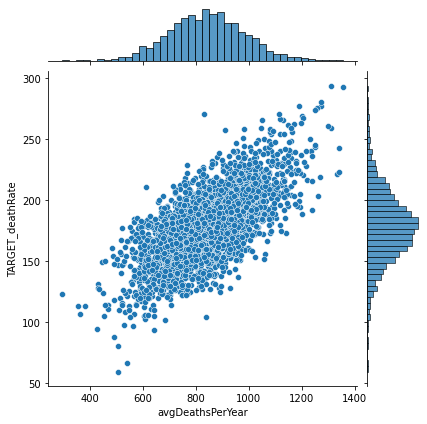

In [284]:
sns.jointplot(data=df, y='TARGET_deathRate', x='avgDeathsPerYear');

#### Modelo de Regressão Linear Simples

In [285]:
x = df['avgDeathsPerYear']
y = df['TARGET_deathRate']

In [286]:
from sklearn.linear_model import LinearRegression
reg_lin_s = LinearRegression()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [287]:
reg_lin_s.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression()

In [288]:
intercept = reg_lin_s.intercept_
coef = reg_lin_s.coef_[0]
print(f'Coeficiente Linear: {intercept}')
print(f'Coeficiente Angular: {coef}')

Coeficiente Linear: 62.71553899101798
Coeficiente Angular: 0.13732128375775735


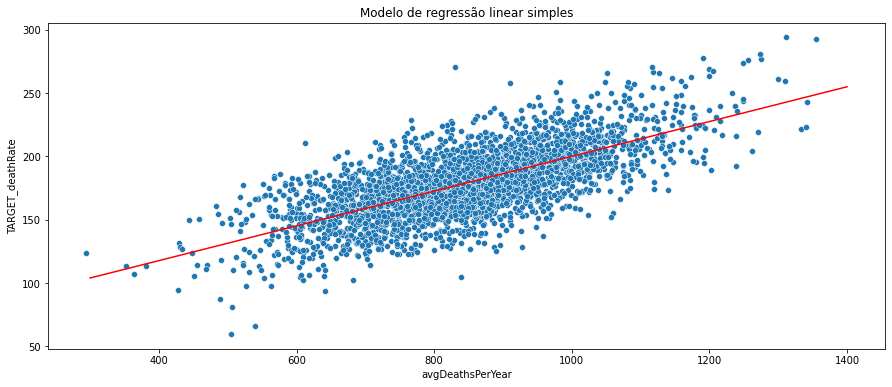

In [289]:
plt.figure(figsize=(15, 6))

sns.scatterplot(data=df, x="avgDeathsPerYear", y="TARGET_deathRate")
x = np.linspace(300, 1400, 10000)
y = intercept + coef*x
plt.plot(x, y, color="red")
plt.title("Modelo de regressão linear simples");

In [290]:
y_pred = reg_lin_s.predict(x_test.values.reshape(-1, 1)) 

In [291]:
residuo = y_test - y_pred
residuo.describe()

count    609.000000
mean       0.116635
std       19.536420
min      -70.539109
25%      -13.073168
50%       -0.583214
75%       13.081929
max       61.027283
Name: TARGET_deathRate, dtype: float64

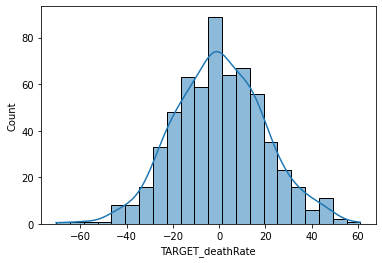

In [292]:
sns.histplot(residuo, kde=True);

In [293]:
test_stat, p = normaltest(residuo)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

alpha = 0.05

if p > alpha:
    print("\nResíduo parece ter uma distribuição normal")
else:
    print("\nResíduo não possui distribuição normal")

Estatística de teste: 0.8323138483830267

p-value: 0.6595767588132411

Resíduo parece ter uma distribuição normal


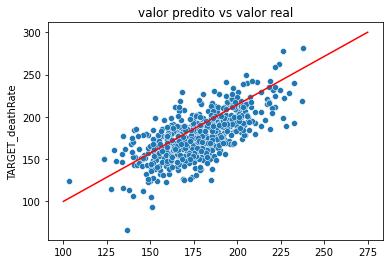

In [294]:
plt.title("valor predito vs valor real")
sns.scatterplot(x=y_pred, y=y_test)
plt.plot(np.linspace(100, 275, 1000), np.linspace(100,300, 1000), color="red")
plt.show()

In [295]:
from sklearn.metrics import r2_score
from sklearn import metrics

r2 = r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
metricas = pd.DataFrame([r2,mae,mse,rmse], index=['R^2', 'MAE', 'MSE', 'RMSE'], columns=['RLinear Simples'])
metricas

RLinear Simples
R^2          0.467998
MAE         15.434911
MSE        381.058603
RMSE        19.520722

### Questão 4

#### Modelo de Regressão Linear Múltipla sem normalizar os dados

In [296]:
df_num = df.select_dtypes(include=[np.number])

df_num = df_num.dropna(axis="columns", how="any")

df_num.select_dtypes(include=[np.number]).isnull().sum()

avgAnnCount               0
avgDeathsPerYear          0
TARGET_deathRate          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
dtype: int64

In [297]:
x = df_num.drop(columns = 'TARGET_deathRate')
y = df_num['TARGET_deathRate']

reg_lin = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

modelo = reg_lin.fit(x_train, y_train)

print("Coeficiente Linear:", modelo.intercept_)
print("Coeficientes Angulares:", modelo.coef_)

Coeficiente Linear: 78.67918579984209
Coeficientes Angulares: [-8.33234940e-04  8.92949693e-02  1.31111612e-01  1.23092538e-04
  2.23859004e-06  3.05404944e-01 -4.23993620e-04 -2.82786516e-03
 -5.19982795e-01  1.57491118e-01 -6.22216474e-01  5.93588793e-01
 -8.25160211e-02  1.52769143e-01 -9.33749122e-02  2.96724356e-01
 -7.99765058e-01  4.81179595e-01 -5.00599499e-01  2.51544487e-01
  9.58793976e-02 -1.19947456e-01 -4.22518139e-02 -5.60507803e-02
 -2.30410922e-02 -8.16463859e-01 -7.41209452e-01 -4.13002645e-01]


TARGET_deathRate
count        609.000000
mean           0.164413
std           16.068959
min          -59.548210
25%           -9.331130
50%           -0.461403
75%           10.383422
max           46.691351

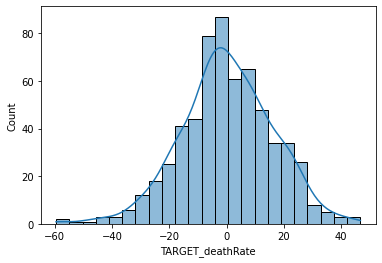

In [298]:
y_pred = modelo.predict(x_test)
residuo = y_test - y_pred
sns.histplot(residuo, kde=True)
residuo.describe().to_frame()

In [299]:
test_stat, p = normaltest(residuo)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

alpha = 0.05

if p > alpha:
    print("\nResíduo parece ter uma distribuição normal")
else:
    print("\nResíduo não possui distribuição normal")

Estatística de teste: 8.22692137651755

p-value: 0.01635109047312789

Resíduo não possui distribuição normal


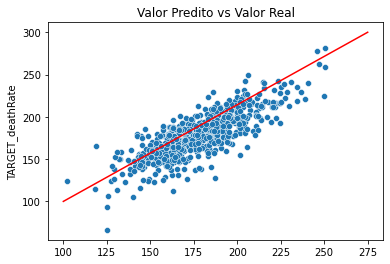

In [300]:
plt.title("Valor Predito vs Valor Real")
sns.scatterplot(x=y_pred, y=y_test)
plt.plot(np.linspace(100, 275, 1000), np.linspace(100,300, 1000), color="red")
plt.show()

In [301]:
r2 = r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

metricas['RLinear Mult'] = [r2,mae,mse,rmse]
metricas

RLinear Simples  RLinear Mult
R^2          0.467998      0.640061
MAE         15.434911     12.527495
MSE        381.058603    257.814493
RMSE        19.520722     16.056603

#### Modelo de Regressão Linear Múltipla normalizando os dados

Coeficiente Linear: 121.3904054856302
Coeficientes Angulares: [-12.88514511  89.5266617  106.58062923  12.67791598  10.15693297
  13.37673653  -4.13915673  -1.68795271 -21.99527224   6.83511453
  -2.45644842  29.32328637  -5.28927695  11.01465518  -4.83682045
  14.03506204 -31.7506728   13.95420826 -34.4913055   14.18710904
   5.16789953  -5.27768807  -3.76004122  -4.75680684  -0.98199809
 -31.6328688  -35.88017791  -8.80776251]

####################################################



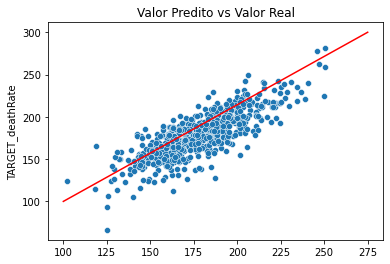

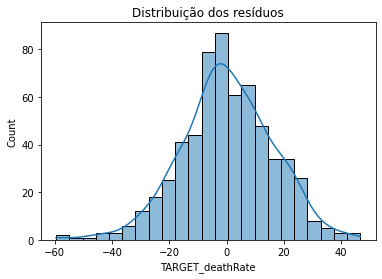

Estatística de teste: 8.2269213765559

p-value: 0.01635109047281436

Resíduo não possui distribuição normal

####################################################


Métricas de avaliação (dados de teste):



RLinear Simples  RLinear Mult  RLinear Mult(mms)
R^2          0.467998      0.640061           0.640061
MAE         15.434911     12.527495          12.527495
MSE        381.058603    257.814493         257.814493
RMSE        19.520722     16.056603          16.056603

In [302]:
x = df_num.drop(columns = 'TARGET_deathRate')
y = df_num['TARGET_deathRate']

leg_lin_mms = LinearRegression()

#Dividindo o conjunto de dados em conjuntos de treino e teste:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Utilizando Min-Max Scaler:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

#Treinando o modelo
modelo = leg_lin_mms.fit(x_train, y_train)

print("Coeficiente Linear:", modelo.intercept_)
print("Coeficientes Angulares:", modelo.coef_)

print("\n####################################################\n")


y_pred = modelo.predict(x_test)

residuo = y_test-y_pred

plt.title("Valor Predito vs Valor Real")
sns.scatterplot(x=y_pred, y=y_test)
plt.plot(np.linspace(100, 275, 1000), np.linspace(100,300, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(residuo, kde=True)
plt.show()

test_stat, p = normaltest(residuo)

print("Estatística de teste:", test_stat)
print("\np-value:", p)

alpha = 0.05

if p > alpha:
    print("\nResíduo parece ter uma distribuição normal")
else:
    print("\nResíduo não possui distribuição normal")

print("\n####################################################\n")

print("\nMétricas de avaliação (dados de teste):\n")


r2 = r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)

metricas['RLinear Mult(mms)'] = [r2,mae,mse,rmse]
metricas

Ambos os modelos de Regressão Linear múltipla obtiveram os exatos mesmos resultados nos testes.

In [303]:
coeff_df = pd.DataFrame(modelo.coef_, x.columns, columns=['Valor do parâmetro'])

coeff_df.abs().sort_values(by='Valor do parâmetro', ascending=False)

Valor do parâmetro
incidenceRate                   106.580629
avgDeathsPerYear                 89.526662
PctMarriedHouseholds             35.880178
PctPrivateCoverage               34.491305
PctBachDeg25_Over                31.750673
PctOtherRace                     31.632869
PercentMarried                   29.323286
MedianAgeMale                    21.995272
PctEmpPrivCoverage               14.187109
PctHS25_Over                     14.035062
PctUnemployed16_Over             13.954208
povertyPercent                   13.376737
avgAnnCount                      12.885145
medIncome                        12.677916
PctHS18_24                       11.014655
popEst2015                       10.156933
BirthRate                         8.807763
MedianAgeFemale                   6.835115
PctNoHS18_24                      5.289277
PctPublicCoverageAlone            5.277688
PctPublicCoverage                 5.167900
PctBachDeg18_24                   4.836820
PctBlack                          4.756807
studyPerCap                       4.139157
PctWhite                          3.760041
AvgHouseholdSize                  2.456448
MedianAge                         1.687953
PctAsian                          0.981998

**incidenceRate** e **avgDeathsPerYear** são as features mais importantes para este modelo, elas possuem os parâmetros mais elevados no modelo de regressão linear múltipla, e, desta forma, o modelo é mais "sensível" à variações nos valores destas features em relação às demais.

### Questão 5

In [304]:
metricas

RLinear Simples  RLinear Mult  RLinear Mult(mms)
R^2          0.467998      0.640061           0.640061
MAE         15.434911     12.527495          12.527495
MSE        381.058603    257.814493         257.814493
RMSE        19.520722     16.056603          16.056603

Os modelos de regressão linear múltipla obtiveram resultados melhores em relação ao modelo de regressão linear simples em todas as métricas apresentadas.